<a href="https://colab.research.google.com/github/Nawaf9997/Traffic_Anlysis/blob/main/Clustering_Task_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## Load the Data

In [3]:
df = pd.read_csv('/content/Traffic_Accidents.csv')
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [41]:
df.describe(include='all')


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000,52000.000000,52000.000000,52000,52000.000000,52000.000000,52000,52000.000000,52000.000000,52000.000000,52000,52000,52000,52000,52000,52000.000000,52000,52000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3286,NaN,NaN,206,NaN,NaN,5,NaN,NaN,NaN,3,6,5,7,6,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2005,NaN,NaN,E10000016,NaN,NaN,Single carriageway,NaN,NaN,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,Yes,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,NaN,NaN,1465,NaN,NaN,39147,NaN,NaN,NaN,51718,43368,38278,43818,35727,NaN,42143,NaN
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.838154,1.834327,1.347654,NaN,4.130712,349.542558,NaN,4.080519,997.078077,NaN,39.148558,2.672673,384.503058,NaN,NaN,NaN,NaN,NaN,1.358788,NaN,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.401537,0.727856,0.848073,NaN,1.926217,259.504721,NaN,1.428056,1806.405065,NaN,14.212826,3.205080,1304.989395,NaN,NaN,NaN,NaN,NaN,0.479690,NaN,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,0.000000,NaN,15.000000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,NaN,2.000000,112.000000,NaN,3.000000,0.000000,NaN,30.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,NaN,4.000000,323.000000,NaN,4.000000,128.500000,NaN,30.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,NaN,6.000000,530.000000,NaN,6.000000,716.000000,NaN,50.000000,6.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,2012.000000


In [5]:
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
25725,457690.0,237450.0,-1.160475,52.032425,34,2.0,2,3.0,06/05/2009,4,...,6,5884,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2009
31068,420610.0,103370.0,-1.708745,50.829438,44,3.0,2,1.0,10/05/2009,1,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2009
39389,501330.0,222470.0,-0.528925,51.891537,40,3.0,2,1.0,27/09/2012,5,...,-1,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2012
27021,383477.0,390813.0,-2.250059,53.413852,6,3.0,2,1.0,09/06/2011,5,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,2.0,Yes,2011
20522,603510.0,141860.0,0.907848,51.139763,46,3.0,2,1.0,22/09/2006,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2006


In [6]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [8]:
df.shape

(52000, 26)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [10]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [13]:
df.replace(['na', 'Na', 'nA', 'NA', 'nan', 'Nan', 'nAn', 'NAn', 'naN', 'NaN', 'nAN', 'NAN', 'Unknown', 'other', "unknown", "other", "Bajaj", "Other", "Unknown"], np.nan, inplace=True)

df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [12]:
df['Accident_Severity'].unique()

array([ 3.,  1., nan,  2.])

In [11]:
df['Accident_Severity'].mode()

,Accident_Severity
0,3.0


In [14]:
df["Accident_Severity"].fillna("3.0",inplace=True)


<ipython-input-14-e14120410a70>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["Accident_Severity"].fillna("3.0",inplace=True)


In [ ]:
df['Accident_Severity'].mode()

In [17]:
df['Number_of_Casualties'].unique()

array([ 1.,  2.,  3., nan,  4.,  9.,  7.,  8.,  5.,  6., 42., 14., 12.,
       10., 13., 24., 51., 18., 11., 23.])

In [18]:
df['Number_of_Casualties'].mode()

,Number_of_Casualties
0,1.0


In [19]:
df["Number_of_Casualties"].fillna("1.0",inplace=True)


<ipython-input-19-45c8eb2f84e7>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["Number_of_Casualties"].fillna("1.0",inplace=True)


In [20]:
df['Light_Conditions'].unique()

array(['Darkeness: No street lighting',
       'Darkness: Street lights present and lit',
       'Daylight: Street light present', nan,
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

In [21]:
df['Light_Conditions'].mode()

,Light_Conditions
0,Daylight: Street light present


In [22]:
df["Light_Conditions"].fillna("Daylight: Street light present",inplace=True)


In [24]:
df["Urban_or_Rural_Area"].unique()


array([ 2.,  1., nan,  3.])

In [25]:
df["Urban_or_Rural_Area"].mode()


,Urban_or_Rural_Area
0,1.0


In [26]:
df["Urban_or_Rural_Area"].fillna("1.0",inplace=True)


<ipython-input-26-ae4e73153044>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["Urban_or_Rural_Area"].fillna("1.0",inplace=True)


In [27]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [29]:

mode_columns = ['Road_Type', 'Weather_Conditions']


for col in mode_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


print(df.isna().sum())


Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

In [37]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,int64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Date,object
Day_of_Week,int64


In [40]:
pd.set_option('display.max_columns', None)
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950,0.277298,50.812789,47,3,1,1,27/11/2009,6,556,E10000011,3,22,Dual carriageway,70,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2,Yes,2009
1,508860.0,187170,-0.430574,51.572846,1,3,2,1,10/10/2010,1,26,E09000017,4,466,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2010
2,314460.0,169130,-3.231459,51.414661,62,3,2,1,14/09/2005,4,746,W06000014,6,0,Single carriageway,30,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2005
3,341700.0,408330,-2.881800,53.568318,4,3,1,2,18/08/2007,7,84,E10000017,6,0,One way street,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,2007
4,386488.0,350090,-2.203020,53.047882,21,3,2,2,06/08/2013,3,257,E06000021,6,0,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380,-0.888006,52.766777,33,3,2,1,31/08/2012,6,365,E10000018,3,607,Single carriageway,30,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
51996,456682.0,127058,-1.192915,51.040030,44,3,1,1,08/05/2013,4,502,E10000014,3,272,Single carriageway,60,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2,Yes,2013
51997,540510.0,152250,0.012032,51.252055,45,3,3,1,01/11/2011,3,516,E10000030,5,85,Single carriageway,40,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,2011
51998,434720.0,334000,-1.485264,52.902301,30,3,2,2,22/07/2011,6,323,E06000015,5,81,Single carriageway,30,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,2011


In [35]:
# Convert to float first, then to integer to handle potential decimals
df['Accident_Severity'] = df['Accident_Severity'].astype('float').astype('int64')
df['Location_Northing_OSGR'] = df['Location_Northing_OSGR'].astype('float').astype('int64')
df['Number_of_Casualties'] = df['Number_of_Casualties'].astype('float').astype('int64')
# The following line is a duplicate and can be removed
# df['Accident_Severity'] = df['Accident_Severity'].astype('int64')
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('float').astype('int64')

In [38]:
df.columns


Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [51]:

# Correct the column names in the drop function if needed
df_cleaned = df.drop(columns=['1st_Road_Class', '2nd_Road_Class', 'Road_Type',
                              'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force',
                              'Local_Authority_(District)', 'Local_Authority_(Highway)',
                              'Date', '1st_Road_Number', '2nd_Road_Number'], inplace=True ) # Make sure these column names match exactly

print(df_cleaned)


None


In [52]:
df.shape

(52000, 15)

In [53]:
df.columns

Index(['Longitude', 'Latitude', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Speed_limit',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [55]:
additional_features = df[['Number_of_Vehicles', 'Number_of_Casualties']]

In [56]:
df

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,0.277298,50.812789,3,1,1,6,70,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2,Yes,2009
1,-0.430574,51.572846,3,2,1,1,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2010
2,-3.231459,51.414661,3,2,1,4,30,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2005
3,-2.881800,53.568318,3,1,2,7,30,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,2007
4,-2.203020,53.047882,3,2,2,3,30,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,-0.888006,52.766777,3,2,1,6,30,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
51996,-1.192915,51.040030,3,1,1,4,60,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2,Yes,2013
51997,0.012032,51.252055,3,3,1,3,40,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,2011
51998,-1.485264,52.902301,3,2,2,6,30,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,2011


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

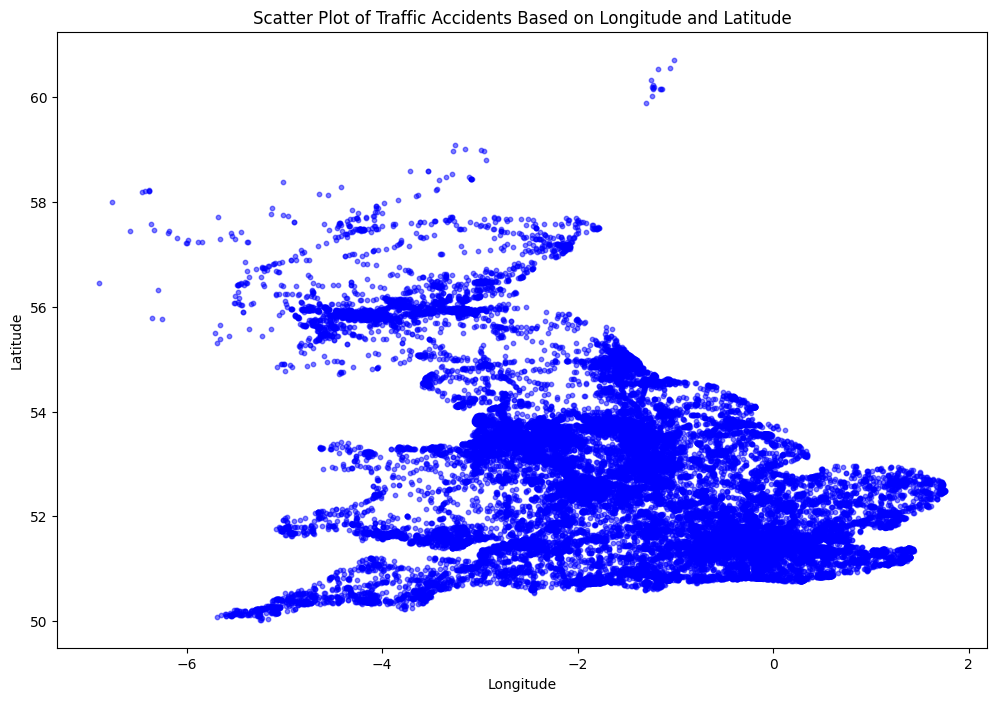

In [64]:

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='blue', s=10)

## Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Traffic Accidents Based on Longitude and Latitude')

# Show the plot
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [90]:

pca = PCA()
pca.fit(data)
explained_var = pca.explained_variance_ratio_

n_components = np.argmax(explained_var >= 0.50) + 1
n_components

NameError: name 'data' is not defined

## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?